# Network Measurements and Data Analysis Lab Homework 1 
The goal of this homework is to investigate the relationship between the Round-Trip Time (RTT) and the distance between two nodes in a network. In this notebook, we will explore aspects of this relationship.

We will begin by collecting data on RTT between our location crawling the [Speedtest](https://www.speedtest.net). Then, we will analyze the data and try to identify any patterns or trends that exist. Finally, we will draw conclusions based on our analysis.

Our approach will involve the following steps:

1. Collect data on RTT
2. Analyze the RTT data according to the distance
3. Choosing an alternate dataset
4. Diving deeper into the problem (Continent Analysis)
5. Interpret the results and draw conclusions

We will be using Python programming language, various data analysis libraries such as NumPy, Pandas, and Matplotlib, and pythonping.

Let's get started!

In [ ]:
# For colab integration
!pip install pythonping 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
# Note that these needs to be installed if you are not using colab
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels import api as sm

# Python library to use ICMP
from pythonping import ping

## Collect Data on RTT

To obtain the server list data for our analysis, I used a crawled dataset from Speedtest servers. However, the initial dataset was too large, with around 11k rows. Therefore, I extracted a small sample of 150 servers that were all pingable to ensure the cleanliness of the data. Since the data from Speedtest servers did not include latitude and longitude attributes, which are crucial for measuring distance, I used the website [IP Location](https://www.iplocation.net/ip-lookup) to locate the exact server locations and gather other useful data such as IP, region, and country. This step is important as it helps to ensure the cleanliness of the data for future analysis. For the sake of making this notebook as clean as possible I didn't put the data extractor script here (it's in the directory). we will use the updated_slice.csv file as our dataset.*italicized text*

In [ ]:
# Reading the CSV file with "NA" as valid values since NA means North America
df = pd.read_csv("updated_slice_f.csv")

# Head of the data
df.head(10)

,Country,City,Continent,Provider,Host,Ping,Latitude,Longitude,Region,IP
0,Russia,Moscow,Europe,Beeline,msk-speedtest2.corbina.net,223.802867,55.7522,37.6156,Moskva,213.221.25.2
1,United States,Atlanta,North America,Newworld CATV,test1.newworldcatv.ph,188.460067,33.7490,-84.3880,Georgia,45.79.222.138
2,United States,Schaumburg,North America,XenSpec,sp.netinformatik.com,182.235651,42.0142,-88.0932,Illinois,23.160.192.16
3,Russia,Yoshkar-Ola,Europe,DOM.RU,speedtest.yola.ertelecom.ru,295.499843,56.6388,47.8908,"Mariy El, Respublika",NaN
4,Colombia,Barranquilla,South America,TigoUne,speedtestbaq1.tigo.com.co,234.448352,10.9639,-74.7964,Atlantico,NaN
5,Brazil,Ibiruba,South America,DGNet,speedtest.dgnet.com.br,298.681132,-28.6275,-53.0897,Rio Grande do Sul,NaN
6,Brazil,Guarapuava,South America,Almix Internet,www.almix.com.br,306.302534,-25.3953,-51.4581,Parana,NaN
7,Italy,Latina,Europe,Panservice,speedtest.panservice.it,233.362655,41.4661,12.9043,Lazio,212.66.97.26
8,Poland,Debowiec,Europe,FHU Vifnet,speedtest.vifnet.pl,263.219094,49.6837,21.4607,Podkarpackie,NaN
9,Tanzania,Arusha,Africa,Arusha Art Ltd,speedtest.cybernet.co.tz,385.121167,-3.3667,36.6833,Arusha,NaN


Before jumping into any text it's important to identify the current server ip and location. 

In [ ]:
# DONT RUN THIS CELL
!curl ipecho.net/plain

34.125.33.12

By looking at the IP adress of our machine ```34.125.107.71``` we notice the server is located in Las Vegas, Nevada, United States.

In [ ]:
# RUN THIS CELL
source_dict = {
    "IP": "34.125.33.12",
    "latitude": 36.1750,
    "longitude": -115.1372,
    "continent": "NA",
    "region": "Nevada",
    "city": "Las Vegas",
    "country": "United States"
}

With the provided data we can move to the pinging phase and try to populate the ping value in our dataset. 

In [ ]:
# DON'T RUN THIS CELL FOR TESTING 
# read the data from already populated pings

# Iterating through the rows
for index, row in df.iterrows():
    # Sometimes server is not reachable or not in the DNS
    # So it's a good practice to catch the error.
    try:
      resp = ping(row["Host"], count=1)
    except:
      continue

    # If the ping is successful overwrite the ping value 
    if resp.success:
        df.loc[index, 'Ping'] = resp.rtt_avg * 1000


# Writing to a csv to not ping every time 
df.to_csv(f"{source_dict.get('IP')}-slice.csv", index=False)

Since We don't want to go through the pinging again we will just use a saved CSV file from the previous sessions. 

In [38]:
# Just run the source_dict cell before this
# RUN THIS CELL
df = pd.read_csv(f"{source_dict.get('IP')}-slice.csv")

df.head(10)

,Country,City,Continent,Provider,Host,Ping,Latitude,Longitude,Region,IP
0,Russia,Moscow,Europe,Beeline,msk-speedtest2.corbina.net,175.995812,55.7522,37.6156,Moskva,213.221.25.2
1,United States,Atlanta,North America,Newworld CATV,test1.newworldcatv.ph,49.387180,33.7490,-84.3880,Georgia,45.79.222.138
2,United States,Schaumburg,North America,XenSpec,sp.netinformatik.com,69.728184,42.0142,-88.0932,Illinois,23.160.192.16
3,Russia,Yoshkar-Ola,Europe,DOM.RU,speedtest.yola.ertelecom.ru,181.908539,56.6388,47.8908,"Mariy El, Respublika",NaN
4,Colombia,Barranquilla,South America,TigoUne,speedtestbaq1.tigo.com.co,102.960863,10.9639,-74.7964,Atlantico,NaN
5,Brazil,Ibiruba,South America,DGNet,speedtest.dgnet.com.br,177.754893,-28.6275,-53.0897,Rio Grande do Sul,NaN
6,Brazil,Guarapuava,South America,Almix Internet,www.almix.com.br,193.811907,-25.3953,-51.4581,Parana,NaN
7,Italy,Latina,Europe,Panservice,speedtest.panservice.it,163.251827,41.4661,12.9043,Lazio,212.66.97.26
8,Poland,Debowiec,Europe,FHU Vifnet,speedtest.vifnet.pl,170.895227,49.6837,21.4607,Podkarpackie,NaN
9,Tanzania,Arusha,Africa,Arusha Art Ltd,speedtest.cybernet.co.tz,283.225138,-3.3667,36.6833,Arusha,NaN


## Analyze the RTT Data According to the Distance

Now we move the data part and try to analyze it. It is always a good idea to now the dataset that we are working on so we first go through the EDA and see if there's any meaningful data in our dataset.

Let's discover the distribution of our servers by their continents. 

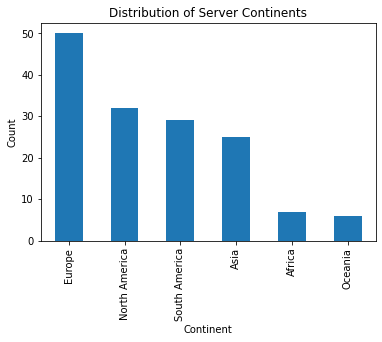

In [39]:
# Geting the value counts of 'Continent' column
cn_count = df["Continent"].value_counts()

# plot distribution count as a bar chart
cn_count.plot(kind="bar")

# add labels and title
plt.xlabel("Continent")
plt.ylabel("Count")
plt.title("Distribution of Server Continents")

# display plot
plt.show()

As we observer in the distribution of our servers we have a really realistic number of servers that suits the internet users of each continent. Therefore we can start working on our data. 

### Assumptions 

Before diving into the calculations let's review the factors that can affect the RTT and how are we tackling them.

1. **Distance**: The distance between the sender and receiver affects the RTT, as the packet has to travel a longer distance. 
To measure the distance between two geo points, we will use the Haversine formula. The Haversine formula calculates the great-circle distance between two points on a sphere (like the Earth) given their longitudes and latitudes. We will discuss the drawbacks and inaccuracies of this method.

2. **Network congestion**: Network congestion can cause delays in the delivery of packets, resulting in an increase in the RTT. 
To tackle this problem we have tested the pings in different times and multiple time and put the mean RTT for comparison.

3. **Bandwidth**: The available bandwidth on the network affects the RTT, as the transmission of packets can be slowed down if the network bandwidth is not sufficient. By using the colab and google network we assume that Bandwidth is enough for us.

4. **Quality of Service (QoS)**: The QoS settings on the network can affect the RTT, as packets may be given priority or delayed based on their QoS classification. Since we are using the google colab service for testing we just hope that the QoS is working in our favour and even if it does not, we probably know that it will affect all of our ping requests in the same way.

5. **Packet size**: Larger packets can take longer to transmit and receive, resulting in an increase in the RTT. Since we used ICMP requests packets are small and this factor will not be a problem.

6. **Router and network device processing times**: Routers and network devices have to process the packets as they pass through them, and this can introduce additional delay in the delivery of packets.
This can affect us, the higher the amount of routers between us and the destination, the higher the RTT.

7. **Network topology**: The way the network is structured can affect the RTT, as the path that packets take can be longer or more complex in some network topologies. Since we are not choosing the path that we are traversing through we might end up going from a path which is not optimal or short, we will explore this problem at the end.


### Calculating the Distance
In order to calculate the distance we will use the Haversine formula. The Haversine formula calculates the great-circle distance between two points on a sphere (like the Earth) given their longitudes and latitudes. We will use ```geopy.distance.distance()``` function, which uses the Haversine formula, to calculate this distance and add them to the dataframe. 

In [40]:
from geopy.distance import distance

# Adding a distance colomn to the df
df["Distance"] = df.apply(
    lambda row: distance(
        (source_dict.get("latitude"), source_dict.get("longitude")), 
        (row["Latitude"], row["Longitude"])
        ).km, 
        axis=1
    )



In [41]:
# To Look at the final Dataframe
df.describe()

,Ping,Latitude,Longitude,Distance
count,149.000000,149.000000,149.000000,149.000000
mean,173.049964,22.360773,2.671510,8904.528914
std,164.775197,30.717311,72.748108,4039.438650
min,13.970000,-37.831800,-124.163700,3.263915
25%,147.952369,-6.208700,-53.089700,8471.541095
50%,170.895227,34.404800,11.806000,9495.549820
75%,194.791456,48.843800,44.629400,11211.295853
max,2000.000000,68.564600,153.430900,16666.312984


By looking at the data we see that the minimum distance is 3kms which is a server in Las Vegas and the maximum is near 17000kms the mean is 8904kms, since our source is inside a kind of remote place in United States (Nevada) this distances are acceptable we can check the results from somewhere inisde the Europe later. this will reduce the numbers significantly. 

for the RTT time the mean is 173ms and min is around 14ms which is probably the server in Las Vegas and the maximum is 2000. 2000ms means the request was timeout so we need to clean those data from our dataset.

In [42]:
# Filtering out the timeout requests
df = df[df["Ping"] != 2000]

# Checking if there is any 2000 RTT remaining
df["Ping"].isin([2000]).any()

False

### Plotting the RTT / Distance
With the clean DF that we have we can plot now.

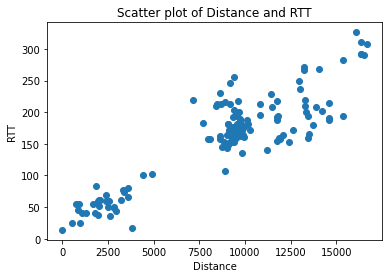

In [21]:
# Using scatter plot to show the relationship between Distance/RTT
plt.scatter(df["Distance"], df["Ping"])

plt.xlabel("Distance")
plt.ylabel("RTT")
plt.title("Scatter plot of Distance and RTT")


plt.show()

We can observe in our scatter plot that the relation between distance and RTT is linear. We know that the RTT is calculated with the formula of ```RTT = 2(L/C + d/v) + n``` the ```2(L/C)``` is the Propagation delay and the ```2(d/v)``` is the transmission delay and n is the variable that we add for other factors like network congestions and etc. Since the Packets travel in the very high speed (speed of light) the ```L/C``` time is very small and can be neglected, for example for 10000km distance, this propagation delay is around 0.033ms (since we are using electromagnetic waves). so the majority of our delay comes from the ```d/v``` and ```n```. ```d``` is the dataframe size and ```v``` is the speed of transmission. since the dataframe for all of our packets are the same (we are using ICMP). only thing remaining is tranmission speed, congestions, routing and router delays in between. We think that with higher distance this factors will have a higher penalty.  

For better fitting the data we will use we can fit it in a linear function. For this case we will use ```np.polyfit``` which fits a polynomial function to a set of data points using least-squares regression. we use a degree of 1 since our problem is linear function.

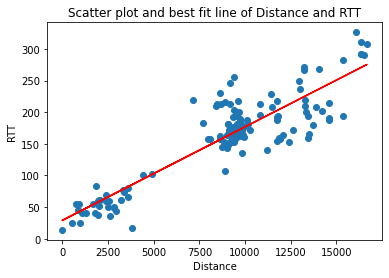

In [22]:
# Calculate the coefficients of a linear regression model
# y = mx + b
m, b = np.polyfit(df["Distance"], df["Ping"], 1)

# Create a function for the line of best fit
best_fit_line = np.poly1d((m, b))

# Creates the initial scatter plot
plt.scatter(df["Distance"], df["Ping"])

# Plot the line of best fit
plt.plot(df["Distance"], best_fit_line(df["Distance"]), color='red')

plt.xlabel("Distance")
plt.ylabel("RTT")
plt.title("Scatter plot and best fit line of Distance and RTT")

# show the plot
plt.show()

We observe that our model fits pretty well inside the scatter plot. For measuring the accruacy we move to the next part.

## Testing the Linear Model

For testing a polynomial regression model we will use a few metrics, in this case we will use MSE and R2. for this testing we will consider these two to see how accurately we can predict RTT with a given distance. We will also calculate MAE to have a better idea about actual error.

In [27]:
# Function For testing 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def test_linear_model(df, test_size, feature_size):
  # Split the data into training and testing sets with test_size Ratio
  X_train, X_test, y_train, y_test = train_test_split(df['Distance'], df['Ping'], test_size=test_size, random_state=42)

  # Fit a polynomial regression model on the training set
  p = np.polyfit(X_train, y_train, feature_size)

  # Use the model to make predictions on the testing set
  y_pred = np.polyval(p, X_test)

  # Compute the mean squared error (MSE) and R2
  print("MSE: ", mean_squared_error(y_test, y_pred))
  print("R2: ", r2_score(y_test, y_pred))
  print("MAE: ", mean_absolute_error(y_test, y_pred))

Testing for 80-20 train, test ratio

In [28]:
# Testing for 80/20
test_linear_model(df, 0.2, 1)

MSE:  1373.0736864702772
R2:  0.4842243166931137
MAE:  27.80793321567443


Since our data is really small (only 150 rows) 80-20 might not be a good test.

In [29]:
# Testing for 70/30
test_linear_model(df, 0.3, 1)

MSE:  1070.3796979773724
R2:  0.6063153409031681
MAE:  23.725472934125346


If we only check the R2 value which is 0.6 (1 is the max, 0 is the lowest) we will get a result of 0.6 which is pretty average, but we have to consider that our dataset was quite small (only 150 rows) so the tests here not accurate. but even with this low amount of data we could calculate the RTT in a really good manner. The MAE value is only 23ms which is a quite small margin considering the data that we initially had. 

## Choosing an alternate dataset


We have observed that our data fits well inside a linear function we should keep that in mind that our source node was inside a remote place in United States (Lasvegas, Nevada) and our test servers were scattered through the world. Finding short distance routes was hards with this starting node. Our dataset was also relativley small (150 rows). So for more exploration we will test another dataset which comes from a computer in Italy, for privacy reasons I'm not providing the ```source_dict``` data and we will only work on the result.

In [32]:
# Just run the source_dict cell before this
# Start from this cell 
alt_df = pd.read_csv("italy-slice_fd.csv")

# Describe 
alt_df.describe()

,Ping,Latitude,Longitude,Distance
count,149.000000,149.000000,149.000000,149.000000
mean,164.428966,22.360773,2.671510,6381.779276
std,230.714808,30.717311,72.748108,4034.796288
min,10.126293,-37.831800,-124.163700,0.000000
25%,65.377322,-6.208700,-53.089700,2291.208196
50%,144.602238,34.404800,11.806000,7561.380421
75%,203.763101,48.843800,44.629400,9383.368713
max,2000.000000,68.564600,153.430900,16555.056599


We can already see that the source node being in Europe equals to a lower mean value for distance and also lower mean value for RTT.

In [34]:
# Filtering out the timeout requests
alt_df = alt_df[alt_df["Ping"] != 2000]

# Checking if there is any 2000 RTT remaining
alt_df["Ping"].isin([2000]).any()

False

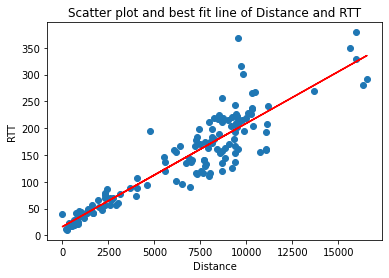

In [35]:
# Re-calculate the coefficients of a linear regression model for Italy data
# y = mx + b
m, b = np.polyfit(alt_df["Distance"], alt_df["Ping"], 1)

# Create a function for the line of best fit
best_fit_line = np.poly1d((m, b))

# Creates the initial scatter plot
plt.scatter(alt_df["Distance"], alt_df["Ping"])

# Plot the line of best fit
plt.plot(alt_df["Distance"], best_fit_line(alt_df["Distance"]), color='red')

plt.xlabel("Distance")
plt.ylabel("RTT")
plt.title("Scatter plot and best fit line of Distance and RTT")

# show the plot
plt.show()

We see that having our source node in Europe the linear function fits very well for distances lower than 5000km (which is probably a place close or inside the mainland Europe). for numbers higher than 5000km it still fits but they are some outliers. 

Let's test MSE and R2 score for our model. 

In [36]:
# Testing for 80/20
test_linear_model(alt_df, 0.2, 1)

MSE:  1023.2434632369038
R2:  0.8899343546958851
MAE:  22.941724950696578


In [37]:
# Testing for 70/30
test_linear_model(alt_df, 0.3, 1)

MSE:  1630.2462658964587
R2:  0.8300285286710992
MAE:  26.709956803855768


We see that by having a source node inside the europe we can achieve a R2 score of 0.88 which is pretty impressive! but we see that our MSE value stays the same for both EU and US source nodes!

## Diving deeper Into The Problem

By observing the data of two datasets that we worked on, we see that the model fits really well for shorter distances and the error gets bigger when we move to longer distances. When we think closely this might be due to continent's location. In order to analyze this we make a correlation heatmap between RTT, Distance and Continents. Since Continent is a label and not a numerical value we first transform it to a numerical value using ```pd.factorize```. 

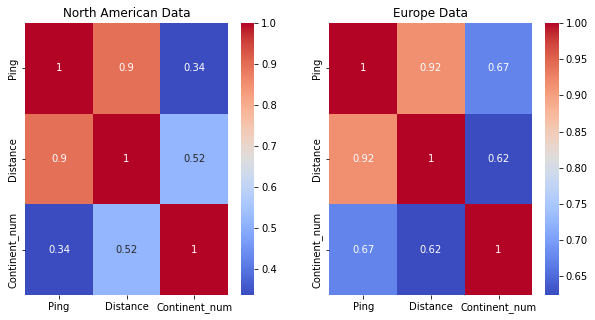

In [62]:
# Convert the 'Continent' column to a numeric representation
df['Continent_num'] = pd.factorize(df['Continent'])[0]
alt_df['Continent_num'] = pd.factorize(alt_df['Continent'])[0]

# Calculate the correlation matrices
corr_matrix1 = df[['Ping', 'Distance', 'Continent_num']].corr()
corr_matrix2 = alt_df[['Ping', 'Distance', 'Continent_num']].corr()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

# Plot the heatmaps on the subplots
sns.heatmap(corr_matrix1, annot=True, cmap='coolwarm', ax=ax1)
sns.heatmap(corr_matrix2, annot=True, cmap='coolwarm', ax=ax2)

# Set the titles for the subplots
ax1.set_title('North American Data')
ax2.set_title('Europe Data')

# Show the plot
plt.show()

By Analysing the the correlation heat map we observe that inside Europe the correlation of RTT and Continent is more than 0.5 which always make exploring that feature interesting. For North America value the correlation is 0.34 which considering the distance of our source with other destinations is something to be expected.


Since the value of continents is not numerical and there is no priority or hiearchy between them (for example academic degree of people is also categorial but there is a hiearchy) we can use one-hot encoding. One-hot encoding is a technique used to represent categorical data in a numerical format that can be used in machine learning models. In one-hot encoding, each category is converted into a binary vector of 0s and 1s, where each vector has a length equal to the number of categories in the variable. Since we now have multiple features (Continent is now a consists of 6 coloumns itself). we will use linear regression to calculate these features. (polynomial model that we used ```np.polyfit``` limits us to have a 1D, X) 

In [63]:
from sklearn.linear_model import LinearRegression

def test_linear_model_with_continent(df, test_size):
  # Concatenate 'Distance' and 'Continent' columns, One-hot encoding for Continents
  X = pd.concat([df['Distance'], pd.get_dummies(df['Continent'])], axis=1)

  # Split the data into training and testing sets with test_size Ratio
  X_train, X_test, y_train, y_test = train_test_split(X, df['Ping'], test_size=test_size, random_state=42)

  # Fit a linear regression model on the training set
  lr = LinearRegression().fit(X_train, y_train)

  # Use the model to make predictions on the testing set
  y_pred = lr.predict(X_test)

  # Compute the mean squared error (MSE) and R2
  print("MSE: ", mean_squared_error(y_test, y_pred))
  print("R2: ", r2_score(y_test, y_pred))
  print("MAE: ", mean_absolute_error(y_test, y_pred))

Testing the linear regression for European Dataset

In [71]:
# Testing for 80/20
test_linear_model_with_continent(alt_df, 0.2)

MSE:  676.5399611307225
R2:  0.9272276734997976
MAE:  17.48706433846105


In [70]:
# Testing for 70/30
test_linear_model_with_continent(alt_df, 0.3)

MSE:  1505.776871795078
R2:  0.8430058600678344
MAE:  24.085837802015035


Testing the linear regression for North American Dataset

In [72]:
# Testing for 80/20
test_linear_model_with_continent(df, 0.2)

MSE:  836.4174424704972
R2:  0.6858116340216112
MAE:  20.251264892475433


In [74]:
# Testing for 70/30
test_linear_model_with_continent(df, 0.3)

MSE:  710.4144324358906
R2:  0.7387102313510945
MAE:  18.73145919216584


With these results we move to the Conclusion.

## Interpret the Results and Draw Conclusions
After analyzing the situation, we determined that the propagation delay has little significance, and that the main factors contributing to delays are bandwidth, congestion, and routing (the number of routers involved). Based on our data, we observed a linear relationship between RTT and distance. Upon further investigation, we discovered a correlation between RTT and continent. Although this correlation likely exists for countries and regions as well, we only analyzed the continent due to the limited amount of data. To incorporate the continent variable into our analysis, we utilized one-hot encoding and attempted to fit it to the distanc and used linear regression to model it.


Here is our aggregated final results.

| Model | Test Size | MSE | R2 | MAE |
| :----: | :----: | :---: | :--: | :---: |
| Europe - polyfit | 0.2 | 1023.24 | 0.88 | 22.94ms |
| Europe - linear regression | 0.2 | 676.53 | 0.92 | 17.48ms |
| Europe - polyfit | 0.3 | 1630.24 | 0.83 | 26.70ms |
| Europe - linear regression | 0.3 | 1505.77 | 0.84 | 24.08ms |
| North America - polyfit | 0.2 | 1373.07 | 0.48 | 27.80ms |
| North America - linear regression | 0.2 | 836.41 | 0.68 | 20.25ms |
| North America - polyfit | 0.3 | 1070.37 | 0.60 | 23.72ms |
| North America - linear regression | 0.3 | 710.41 | 0.73 | 18.73ms |


Since our dataset was really small we calculated both test size of ```0.2``` and ```0.3``` we found out that with both values using linear reggresion with continents drastically improves the accuracy. The results would be much more meaningful and accurate if our dataset was bigger. But in any case we can estimate the RTT based on distance with a really good accuracy. 

Something else to keep in mind that the Continent value is not a statistically independent value from Distance. shorter the distance the more chance that we are still in the same continent. something else that can be done in the future with bigger datasets is to make new features with distance, continent and country values. This will drastically increase our estimate accuracy. 

Hessam Hashemizadeh